In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import f1_score,roc_auc_score
from sklearn.metrics import precision_score,recall_score

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv('../Downloads/data_banknote_authentication.txt')

In [5]:
data.columns = ['variance of Wavelet Transformed image','skewness of Wavelet Transformed image','curtosis of Wavelet Transformed image','entropy of image', 'class']

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371 entries, 0 to 1370
Data columns (total 5 columns):
variance of Wavelet Transformed image    1371 non-null float64
skewness of Wavelet Transformed image    1371 non-null float64
curtosis of Wavelet Transformed image    1371 non-null float64
entropy of image                         1371 non-null float64
class                                    1371 non-null int64
dtypes: float64(4), int64(1)
memory usage: 53.6 KB


In [7]:
data.head()

,variance of Wavelet Transformed image,skewness of Wavelet Transformed image,curtosis of Wavelet Transformed image,entropy of image,class
0,4.54590,8.1674,-2.4586,-1.46210,0
1,3.86600,-2.6383,1.9242,0.10645,0
2,3.45660,9.5228,-4.0112,-3.59440,0
3,0.32924,-4.4552,4.5718,-0.98880,0
4,4.36840,9.6718,-3.9606,-3.16250,0


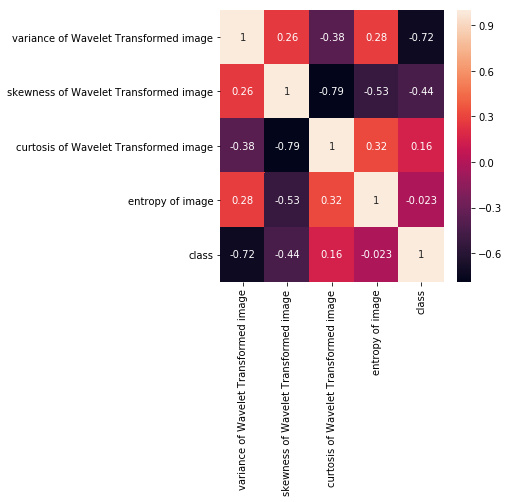

In [8]:
bna_corr = data.corr()
plt.figure(figsize=(5,5))
sns.heatmap(bna_corr,annot=True)

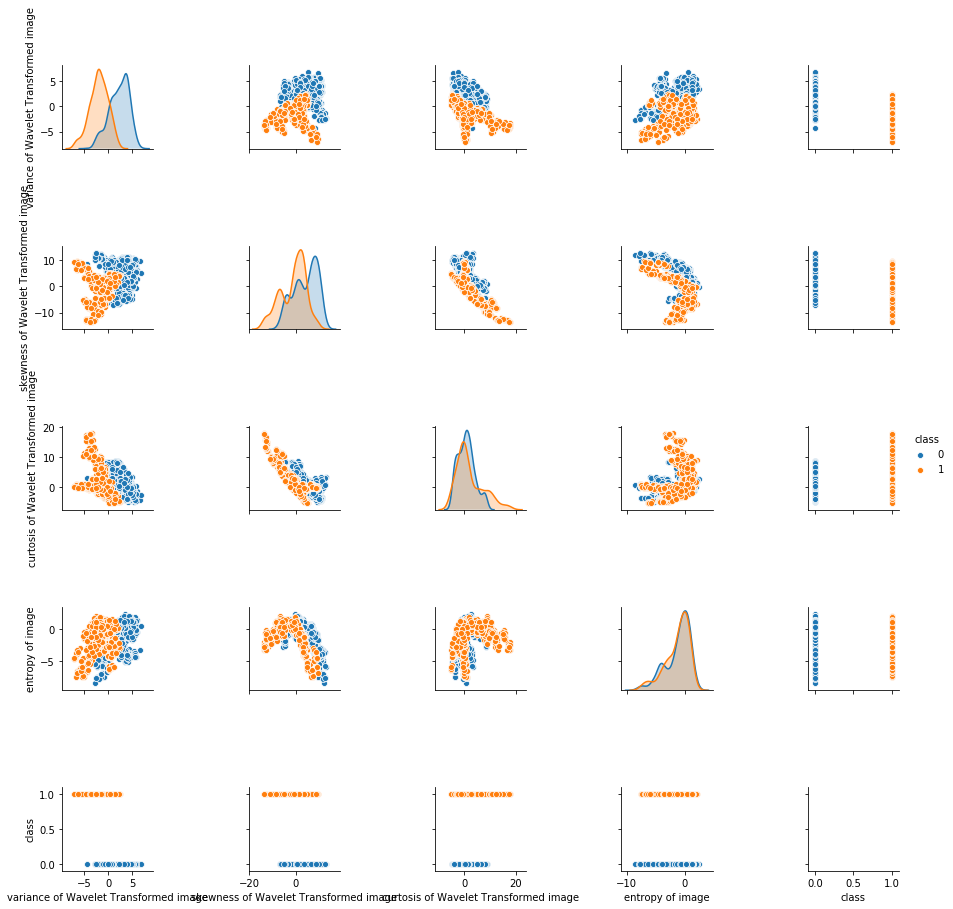

In [9]:
sns.pairplot(data=data,hue='class')

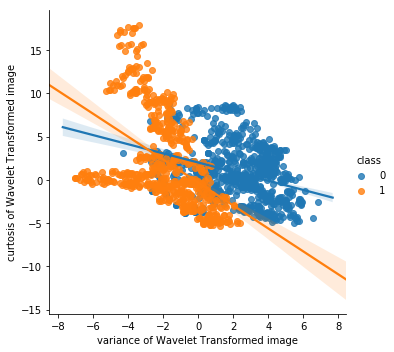

In [10]:
sns.lmplot(x='variance of Wavelet Transformed image',y='curtosis of Wavelet Transformed image',data=data,hue='class')

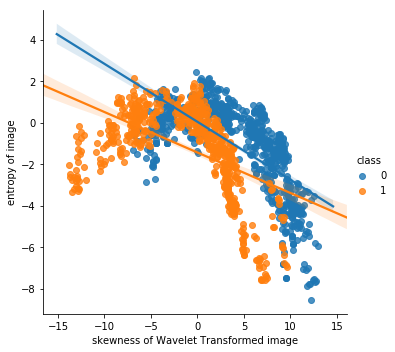

In [11]:
sns.lmplot(x='skewness of Wavelet Transformed image',y='entropy of image',data=data,hue='class')

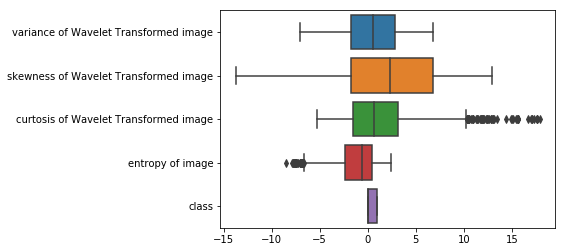

In [12]:
sns.boxplot(data = data,orient='h')

In [13]:
X = data.iloc[:,:-1].values
print(X.shape)
y = data.iloc[:,-1].values
y = y.reshape(-1, 1)
print(y.shape)

(1371, 4)
(1371, 1)


### Logistic Regresion

In [14]:
# function to find best value of Random_state
def someNum(num):
    xtrain,xtest,ytrain,ytest= train_test_split(X,y,test_size=.33,random_state=num,stratify=y)
    logisticRegression = LogisticRegression()
    logisticRegression.fit(xtrain,ytrain)
    predicted  = logisticRegression.predict(xtest)
    f1score = f1_score(ytest,predicted)
    recallscore = recall_score(ytest,predicted)
    precisionscore = precision_score(ytest, predicted)
    acc_score = accuracy_score(ytest, predicted)
    return f1score,recallscore,precisionscore,acc_score

In [15]:
f1_score_=[]
recall_score_=[]
precision_score_=[]
acc_score_ =[]
for a in range(0,50):
    f1score,recallscore,precisionscore,acc_score = someNum(a)
    f1_score_.append(f1score)
    recall_score_.append(recallscore)
    precision_score_.append(precisionscore)
    acc_score_.append(acc_score)

In [16]:
# custom plot function
def listPlot(lis,n):
    plt.figure()
    plt.plot([x * 100 for x in lis])
    plt.xlabel('N value')
    plt.ylabel('(%)')
    plt.title("X = {} Y = {}".format([x for x in range(n)][np.argmax(lis)], (max(lis)*100)))
    plt.axhline(y=(max(lis)*100),color = 'r', linestyle = '--')
    plt.axvline(x=[x for x in range(n)][np.argmax(lis)],color = 'g', linestyle = '--')
    plt.show()

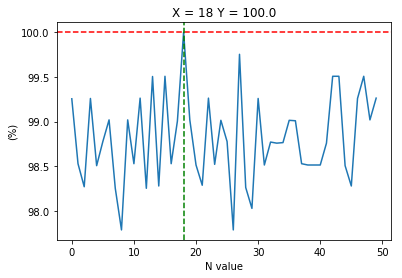

In [17]:
listPlot(f1_score_,50)

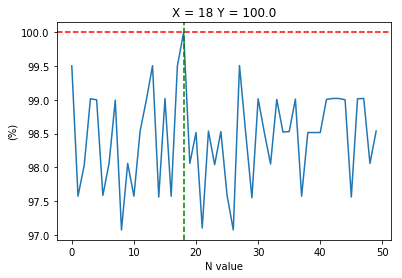

In [18]:
listPlot(precision_score_,50)

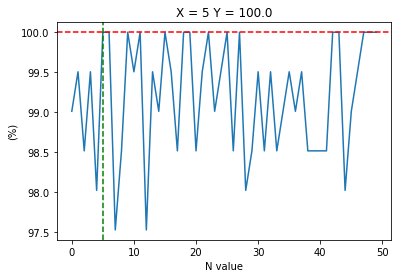

In [19]:
listPlot(recall_score_,50)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=18,stratify=y)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((918, 4), (453, 4), (918, 1), (453, 1))

In [21]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
f1_score(y_test,lr_predict)*1

1.0

### Cross Validation Score

In [22]:
log_reg = cross_val_score(estimator = lr, X = X_train, y = y_train, cv = 45)
log_reg.mean()

0.9812698412698414

### Decision Tree Classifier

In [23]:
from sklearn.tree import DecisionTreeClassifier

In [24]:
def maxDepthDT(depth):
    dt = DecisionTreeClassifier(max_depth=depth,random_state=4)
    dt.fit(X_train,y_train)
    dt_predict = dt.predict(X_test)
    return (dt.score(X_train,y_train)),dt.score(X_test,y_test)
    

In [25]:
train_acc = []
validate_acc = []
for i in range(1,11):
    train_a,val_a = maxDepthDT(i)
    train_acc.append(train_a)
    validate_acc.append(val_a)

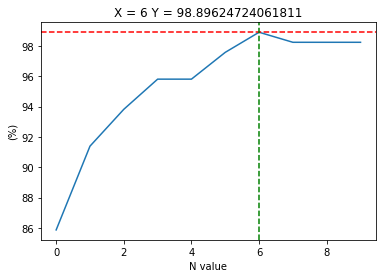

In [26]:
listPlot(validate_acc,10)

In [27]:
trade = pd.DataFrame({
    'max depth':range(1,11),
    'training acc':train_acc,
    'validation acc':validate_acc
})
trade

,max depth,training acc,validation acc
0,1,0.850763,0.858720
1,2,0.917211,0.913907
2,3,0.937908,0.938190
3,4,0.965142,0.958057
4,5,0.982571,0.958057
5,6,0.992375,0.975717
6,7,0.997821,0.988962
7,8,1.000000,0.982340
8,9,1.000000,0.982340
9,10,1.000000,0.982340


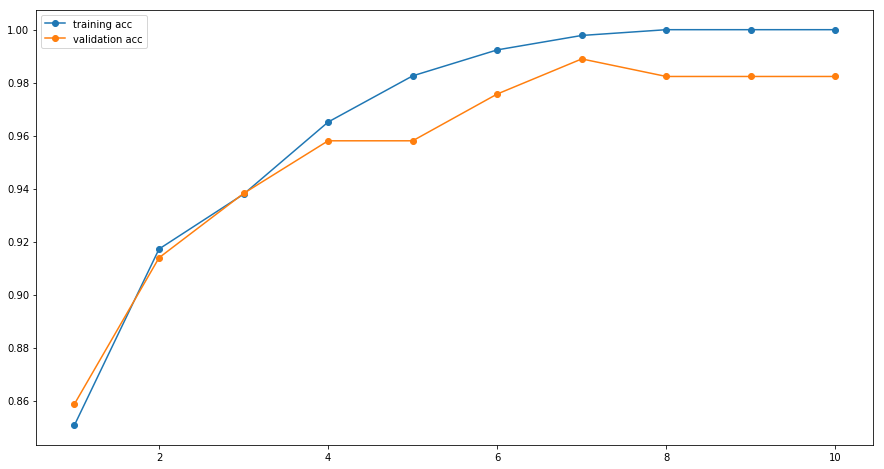

In [28]:
plt.figure(figsize=(15,8))
plt.plot(trade['max depth'],trade['training acc'],marker='o')
plt.plot(trade['max depth'],trade['validation acc'],marker='o')
plt.legend()

In [29]:
dt = DecisionTreeClassifier(random_state=4,max_depth=7)
dt.fit(X_train,y_train)
dt_predict = dt.predict(X_test)
dt.score(X_train,y_train)*100

99.78213507625271

In [30]:
#print confusion matrix and accuracy score
dt_conf_matrix = confusion_matrix(y_test, dt_predict)
dt_acc_score = accuracy_score(y_test, dt_predict)
print(dt_conf_matrix)
print(dt_acc_score*100)

[[248   3]
 [  2 200]]
98.89624724061811


In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
rfc = RandomForestClassifier()

In [36]:
rf = RandomForestClassifier(random_state=10,n_estimators=41,criterion='gini',max_depth=2)

In [37]:
rf.fit(X_train, y_train)
rf_predict=rf.predict(X_test)

In [38]:
#print confusion matrix and accuracy score
rf_conf_matrix = confusion_matrix(y_test, rf_predict)
rf_acc_score = accuracy_score(y_test, rf_predict)
print(rf_conf_matrix)
print(rf_acc_score*100)

[[245   6]
 [ 18 184]]
94.70198675496688


In [39]:
rf.feature_importances_

array([0.59446424, 0.2392883 , 0.13519267, 0.0310548 ])

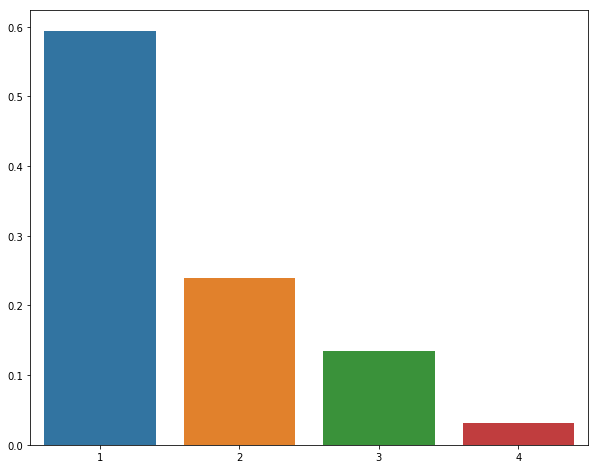

In [40]:
plt.figure(figsize=(10,8))
sns.barplot(y =rf.feature_importances_,x=[1,2,3,4])